In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv("data/mnist_train.csv")
test_df = pd.read_csv("data/mnist_test.csv")

In [6]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
# push the pixel value ranging from 0-255 to 0-1
def normalize_df(df):
    return df / 255.0


train_df_np = train_df.to_numpy()
test_df_np = test_df.to_numpy()

train_X_original = train_df_np[:, 1:]  # all rows, columns from index 1 to end
train_Y_original = train_df_np[:, 0]   # all rows, column at index 0
test_X_original = test_df_np[:, 1:]  # all rows, columns from index 1 to end
test_Y_original = test_df_np[:, 0]   # all rows, column at index 0

train_X = normalize_df(train_X_original)  # normalize pixel values to range 0-1
test_X = normalize_df(test_X_original)

train_Y = np.array([np.array([1 if i == label else 0 for i in range(10)]) for label in train_Y_original])  # one-hot encode labels
test_Y = np.array([np.array([1 if i == label else 0 for i in range(10)]) for label in test_Y_original])

print(f"train_X shape: {train_X.shape}, train_Y shape: {train_Y.shape}")
print(f"test_X shape: {test_X.shape}, test_Y shape: {test_Y.shape}")

print(train_X[0])  # print first image pixel values
print(train_Y)  # print first image label

train_X shape: (60000, 784), train_Y shape: (60000, 10)
test_X shape: (10000, 784), test_Y shape: (10000, 10)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.  

<h1>Start Training</h1>
<p>---------------------------------------</p>

In [13]:
learning_rate = 1.5
epochs = 5000

print(train_X.shape[1])  # number of features (pixels) in each image
neuron_layers = [train_X.shape[1], 24, 12, 10]  # 784 input neurons, 24 hidden neurons, 12 hidden neurons, 10 output neurons

784


In [14]:
# Initialize weights and biases for each layer
np.random.seed(40)  # for reproducibility

w = []
for i in range(len(neuron_layers) - 1):
    # Matrix of weights for Layer i to Layer i+1
    weights = np.random.randn(neuron_layers[i], neuron_layers[i + 1]) # matrix of neuronal_layers[i] rows and neuronal_layers[i+1] columns
    w.append(weights)

b = []
for i in range(1, len(neuron_layers)):
    # Bias vector for Layer i
    biases = np.random.randn(neuron_layers[i]) # vector of neuronal_layers[i] entries
    b.append(biases)

print("Weights:", w)
print("Biases:", b)

Weights: [array([[-0.6075477 , -0.12613641, -0.68460636, ...,  0.10895031,
         0.03172679,  1.27263986],
       [ 1.0714479 ,  0.41581801,  1.55067923, ...,  0.26671631,
         0.00898941,  0.64110275],
       [-0.17770716,  0.69627761, -1.1887251 , ..., -0.02070278,
        -1.81352177,  0.20352189],
       ...,
       [-2.20997045, -1.48827842,  1.23193263, ...,  0.91332012,
        -0.11148796,  0.10840572],
       [-0.34346909, -0.22138858,  0.74352927, ..., -1.54694635,
         0.08889181,  0.26012462],
       [ 0.72573178, -1.15947005, -0.51378388, ..., -0.48199419,
         1.44721549, -0.16274366]], shape=(784, 24)), array([[-3.69066815e-01,  5.89651330e-01, -1.43247965e-01,
         7.89850644e-01,  3.57409046e-01, -9.60205803e-02,
        -6.52531473e-01,  2.27379326e-01,  2.76057884e-01,
         2.33166299e+00, -9.00951794e-01, -4.01972181e-01],
       [-4.68800921e-02,  2.62033793e-01,  1.81470169e+00,
        -8.35398361e-01,  1.21418174e+00, -2.24189626e+00,
    

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [20]:
def feed_forward_neural_network(neuron_vals, w, b):
    activations = [neuron_vals]

    for layer_weights, layer_biases in zip(w, b):
        neuron_vals_before_activation = neuron_vals @ layer_weights + layer_biases # first matrix multiplication, then + bias

        if layer_weights is not w[-1]:
            # we only want to apply the activation function to the hidden layers, not the output layer
            neuron_vals = sigmoid(neuron_vals_before_activation)
        else:
            neuron_vals = neuron_vals_before_activation  # output layer without activation function

        ######## ------------- WHY NO ACTIVATION FUNCTION IN THE OUTPUT LAYER? ------------- ########
        # !!! here was a mistake before, I applied the sigmoid function to the output layer as well
        # for multi-class predictions we don't want to do that tho, because then the softmax function produces unsatisfying results
        # the values after the softmax function are not as "confident" and are pretty flat
        # the softmax function can also handle negative values, which we would not have if we applied the sigmoid function before
        # e.g. if the values are really small after the sigmoid (close to 0), the softmax would go close to (1/number_of_classes) for the wrong classes and also flattening the correct class, which is not what we want

        activations.append(neuron_vals)
        
    return activations


In [21]:
def softmax(z):
    output = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True) # axis=1 means sum each row, keepdims=True ensure the result is (n, 1) and not (n,)
    return output


In [22]:
def calc_log_loss(features, labels, w, b):
    pred_label = feed_forward_neural_network(features, w, b)[-1]
    pred_label = softmax(pred_label)

    pred_label = np.clip(pred_label, 1e-10, 1 - 1e-10)
    log_loss = np.mean(np.sum(-labels * np.log(pred_label), axis=1))
    # using categorical cross-entropy loss function, because we have multiple classes (10 digits)
    # otherwise, when we would use binary cross-entropy loss function, the problem would push other values more and more to zero => softmax function already does that
    # (probabilities for other classes automatically go lower when the correct class probability goes higher)
    return log_loss

log_loss = calc_log_loss(train_X, train_Y, w, b)
print(f"Loss: {log_loss}")

Loss: 0.18865108235383574


In [23]:
def calc_gradients(features, labels, w, b):
    dB = [np.zeros_like(bias) for bias in b]  # gradient for biases
    dW = [np.zeros_like(weights) for weights in w]  # gradient for weights

    activations = feed_forward_neural_network(features, w, b)
    predictions = softmax(activations[-1])  # apply softmax to the output layer activations
    
    delta = predictions - labels    # initial delta (dL/da)
    ####### ------------- WHY CAN WE JUST WRITE THE dL/dz FUNCTION LIKE THIS? ------------- #######
    # when using softmax + categorical cross-entropy loss function, the derivative of the loss with respect to the z-function (dL/dz) is simply (predictions - labels)
    # they cancel each other out, simplifying like this

    for idx in range(len(w)-1, -1, -1):
        if (idx == len(w)-1):
            pass
        else:
            layer_activations = activations[idx+1].T    # current layer activations to calculate the sigmoid derivative
            der_sigmoid = layer_activations * (1 - layer_activations)   # derivative of sigmoid


            following_weights = w[idx + 1]  # weights of the next layer to calculate the derivative of the z-function (dz/da) with respect to the activations

            delta = delta @ following_weights.T * der_sigmoid.T  # update delta for next layer (dz/da * da/dz)
    
        der_weights = activations[idx].T  # previous layer activations to calculate the z-derivative (dz/dw)

        dW[idx] = der_weights @ delta / features.shape[0]  # gradient for weights (dz/dw)  => shape[0] is the number of rows (num samples)
        # we have multiple der_weights arrays (one for each previous sample), so for every previous neuron we multiply take the mean from all samples for every of the previous neurons
        # dW has the amount of previous neurons rows and the amount of current neurons columns
        # (first row = first previous neuron, first column = first current neuron, second column = second current neuron, ...)
        
        dB[idx] = delta.mean(axis=0) # gradient for bias (dz/db)
    return dW, dB

In [24]:
def update_weights_and_biases(w, b, dW, dB, learning_rate):
    #print("Weights before update:", w)
    #print("Weight Gradients:", dW)

    for i in range(len(w)):
        w[i] -= learning_rate * dW[i]
        b[i] -= learning_rate * dB[i]
    return w, b

In [14]:
def train_network(features, labels, w, b):
    initial_loss = calc_log_loss(features, labels, w, b)
    print("Initial Loss:", initial_loss)

    for epoch in range(epochs):
        dW, dB = calc_gradients(features, labels, w, b)
        w, b = update_weights_and_biases(w, b, dW, dB, learning_rate)

        if epoch % 100 == 0:
            loss = calc_log_loss(features, labels, w, b)
            print(f"Epoch {epoch}, Loss: {loss}")


train_network(train_X, train_Y, w, b)

Initial Loss: 3.6444450206941554
Epoch 0, Loss: 2.9403115374149915
Epoch 100, Loss: 1.0926909241170932
Epoch 200, Loss: 0.8132193850557378
Epoch 300, Loss: 0.6624373259762593
Epoch 400, Loss: 0.5706155963755651
Epoch 500, Loss: 0.5085612416384934
Epoch 600, Loss: 0.4632590196741711
Epoch 700, Loss: 0.42944309950892645
Epoch 800, Loss: 0.4034237287193419
Epoch 900, Loss: 0.3824802309162488
Epoch 1000, Loss: 0.36490496133874295
Epoch 1100, Loss: 0.35010212133285246
Epoch 1200, Loss: 0.3374790472678998
Epoch 1300, Loss: 0.32649011660257043
Epoch 1400, Loss: 0.3167885815776579
Epoch 1500, Loss: 0.30813116773664234
Epoch 1600, Loss: 0.3003247727482681
Epoch 1700, Loss: 0.29322063046241637
Epoch 1800, Loss: 0.2867018245638078
Epoch 1900, Loss: 0.28068421913003294
Epoch 2000, Loss: 0.2751084952938169
Epoch 2100, Loss: 0.26992630125253914
Epoch 2200, Loss: 0.2650890600724254
Epoch 2300, Loss: 0.26055038546731646
Epoch 2400, Loss: 0.2562728484447042
Epoch 2500, Loss: 0.2522262829712741
Epoch 26

In [25]:
def predict(test_X, test_Y, w, b):
    activations = feed_forward_neural_network(test_X, w, b)
    predictions = activations[-1]
    predictions = softmax(predictions)
    print(predictions)

    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(test_Y, axis=1)

    accuracy = np.mean(predicted_classes == true_classes)
    print(f"Accuracy: {accuracy * 100:.2f}%")

predict(test_X, test_Y, w, b)

[[2.41116952e-06 1.91342008e-05 2.76511910e-04 ... 9.98099428e-01
  2.18744598e-05 3.35846481e-04]
 [1.18952690e-04 1.98544280e-02 9.73348359e-01 ... 2.00468137e-04
  2.74496388e-04 4.72229069e-07]
 [8.92744844e-07 9.95611822e-01 1.01115749e-04 ... 6.20551628e-05
  1.70410594e-03 9.51752202e-07]
 ...
 [5.75267486e-07 6.05249690e-06 2.06609501e-05 ... 4.09622110e-04
  9.35202920e-04 1.17498031e-02]
 [1.16085413e-04 2.89354982e-03 2.82498804e-06 ... 6.56697836e-04
  1.75402542e-03 1.55472502e-04]
 [2.74773056e-05 9.67928960e-06 3.69314259e-04 ... 4.50352629e-06
  1.33333598e-05 1.26177507e-07]]
Accuracy: 93.22%


In [ ]:
# save weights and biases
weight_dict = {f'weights_{i}': w[i] for i in range(len(w))}
bias_dict = {f'biases_{i}': b[i] for i in range(len(b))}

file_name = "mnist_model_v1_93_22.npz"

np.savez(file_name, **weight_dict, **bias_dict)

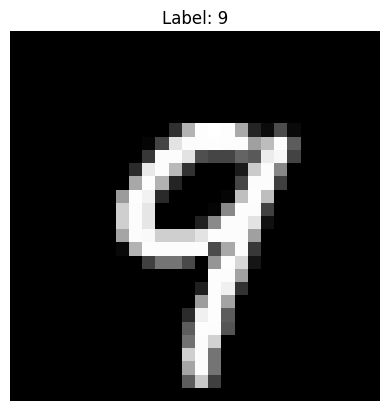

Predicted class: 9


In [29]:
# load weights and biases from file
file_name = "mnist_model_v1_93_22.npz"
data = np.load(file_name)
w = [data[f'weights_{i}'] for i in range(len(w))]
b = [data[f'biases_{i}'] for i in range(len(b))]

# plot a picture of a number
def plot_number(index):
    image = test_X[index].reshape(28, 28)  # reshape the flat array to a 28x28 matrix
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {test_Y_original[index]}")
    plt.axis('off')  # turn off axis labels
    plt.show()


def get_number_prediction(index):
    image = test_X[index:index+1]
    activations = feed_forward_neural_network(image, w, b)
    predictions = softmax(activations[-1])

    predicted_class = np.argmax(predictions, axis=1)[0]
    print(f"Predicted class: {predicted_class}")

    return predicted_class

def predict_index(index=0):
    plot_number(index)
    get_number_prediction(index)

predict_index(12)
